In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import math

import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from matplotlib import style

In [20]:
dataset = pd.read_csv('student-mat.csv', sep=';')
print(dataset.shape)
pd.set_option('display.max_columns',50)
dataset.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [21]:
reqdata = dataset[['G1','G2','G3','studytime','failures','absences']]
reqdata.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [22]:
pred_label = 'G3'
x = np.array(reqdata.drop([pred_label], 1))
y = np.array(reqdata[pred_label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

In [ ]:
#linear = linear_model.LinearRegression()
# linear.fit(x_train, y_train)
# lm_accuracy = linear.score(x_test, y_test)
# print(lm_accuracy)

In [ ]:
# Pickle svaes the model with req name as .pickle file
# with open("studentmodel.pickle","wb") as file:
#     pickle.dump(linear,file)
    


In [23]:
best = 0
for vari in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    lm_accuracy = linear.score(x_test, y_test)
    print(lm_accuracy)
    
    if lm_accuracy > best:
        best = lm_accuracy
        with open("studentmodel.pickle","wb") as file:
            pickle.dump(linear,file)

0.8199025553618863
0.7908352995672769
0.898806107462493
0.8657828772562968
0.629312558273093
0.7905997852022936
0.930276901596462
0.7293471795157632
0.8870240054683289
0.8501120797839827
0.7574010017705944
0.7988577764833806
0.8799762582598973
0.8646283521699428
0.7983195146666807
0.7623050834760694
0.875647073991844
0.7788800816227186
0.8711961018609669
0.8095298142966404
0.8251625860100668
0.9250540245178249
0.7241771890529288
0.7029832105875242
0.9176742900201398
0.858073189040809
0.7052463044787554
0.8603487284985769
0.8235249116165135
0.9040848042557986


In [25]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [27]:
# how to use this machine learning model
print('Co: ', linear.coef_)
print('Int: ', linear.intercept_)
print(type(linear.coef_))
print(type(linear.intercept_))
print(best)

Co:  [ 0.15152522  0.97675388 -0.17101059 -0.27189371  0.04076051]
Int:  -1.528221298744656
<class 'numpy.ndarray'>
<class 'numpy.float64'>
0.930276901596462


In [28]:
prediction = linear.predict(x_test)
for i in range(len(prediction)):
    print(prediction[i], x_test[i], y_test[i])

11.874699088671266 [14 12  4  0  6] 13
14.408872467293662 [13 15  4  0  0] 15
14.90241886773043 [14 15  2  0  0] 16
11.851788742216987 [15 12  2  1  0] 12
8.093773515514528 [10  9  4  0  0] 0
-0.9104490236109014 [7 0 1 1 0] 0
12.808902681994956 [12 13  2  0  4] 13
10.773873911470728 [12 11  2  0  2] 12
16.263744208779478 [16 16  2  0  2] 17
3.2780077244980683 [6 5 1 3 0] 0
9.424065368612586 [ 9 10  2  0  4] 10
15.034458730000052 [16 15  3  0  0] 15
9.260886401694215 [11  9  1  1 19] 10
9.253054780891805 [ 9 10  3  0  4] 10
10.470823461480324 [10 11  2  0  2] 11
4.392442229873215 [ 6  5  1  1 14] 5
12.166201413436262 [12 12  1  0  8] 12
19.388081358313336 [19 19  4  0  4] 20
8.550107643811002 [10  9  3  0  7] 9
13.945150350990422 [13 14  1  0  0] 14
12.80105736738782 [11 13  1  1 10] 13
9.494069582014733 [10 10  2  0  2] 10
8.598836714142204 [10  9  2  0  4] 11
12.62637529608327 [13 13  3  0  0] 14
12.37976228729894 [14 12  2  0 10] 11
-0.7667377861883349 [12  0  3  2  0] 0
15.135465104

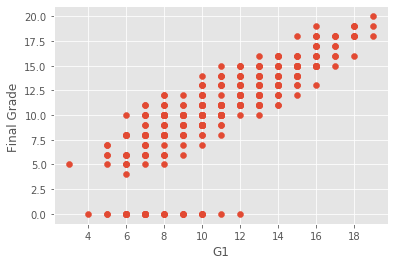

In [29]:
p = "G1"
style.use("ggplot")
plt.scatter(reqdata[p],reqdata["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade ")
plt.show()

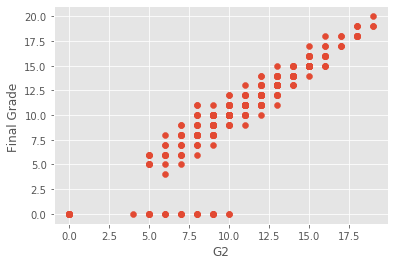

In [30]:
p = "G2"
style.use("ggplot")
plt.scatter(reqdata[p],reqdata["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade ")
plt.show()

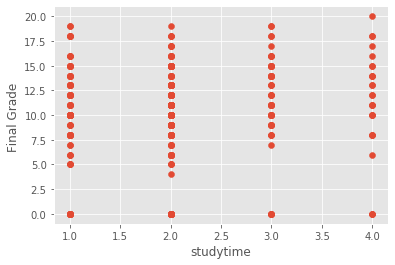

In [31]:
p = "studytime"
style.use("ggplot")
plt.scatter(reqdata[p],reqdata["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade ")
plt.show()

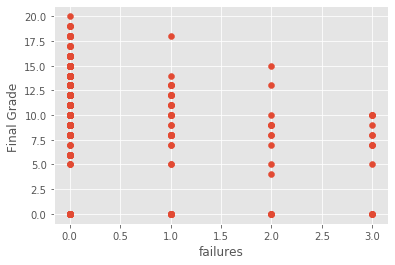

In [32]:
p = "failures"
style.use("ggplot")
plt.scatter(reqdata[p],reqdata["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade ")
plt.show()

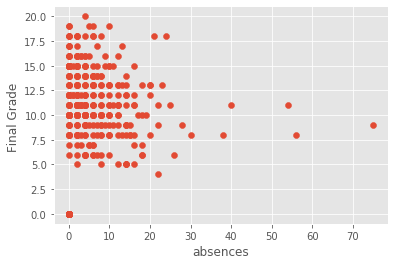

In [33]:
p = "absences"
style.use("ggplot")
plt.scatter(reqdata[p],reqdata["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade ")
plt.show()

## following is my attempt to floor the values and make the prediction more better as the scores are integral

In [34]:
# improved prediction my way
array_pred = []
for p in range(len(prediction)):
    array_pred.append(math.floor(prediction[p]))
    
print('the array of predicted score of G3')
for val in range(len(array_pred)):
    print(array_pred[val])

the array of predicted score of G3
11
14
14
11
8
-1
12
10
16
3
9
15
9
9
10
4
12
19
8
13
12
9
8
12
12
-1
15
15
18
8
-1
11
19
8
11
7
8
3
12
12


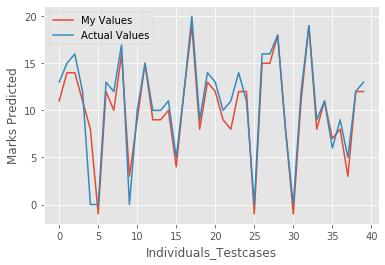

In [35]:
plt.plot(list(range(len(array_pred))), array_pred, label='My Values')
plt.plot(list(range(len(y_test))), y_test, label='Actual Values')
plt.xlabel("Individuals_Testcases")
plt.ylabel("Marks Predicted")
plt.legend()

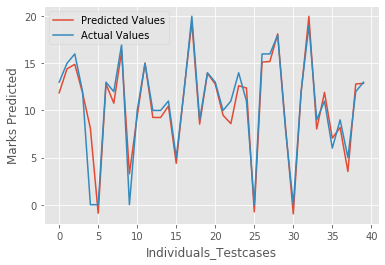

In [36]:
plt.plot(list(range(len(prediction))), prediction, label='Predicted Values')
plt.plot(list(range(len(y_test))), y_test, label='Actual Values')
plt.xlabel("Individuals_Testcases")
plt.ylabel("Marks Predicted")
plt.legend()